## Load Balancing Problem
Following Kleinberg and Tardos

In [69]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches


## Choose colors

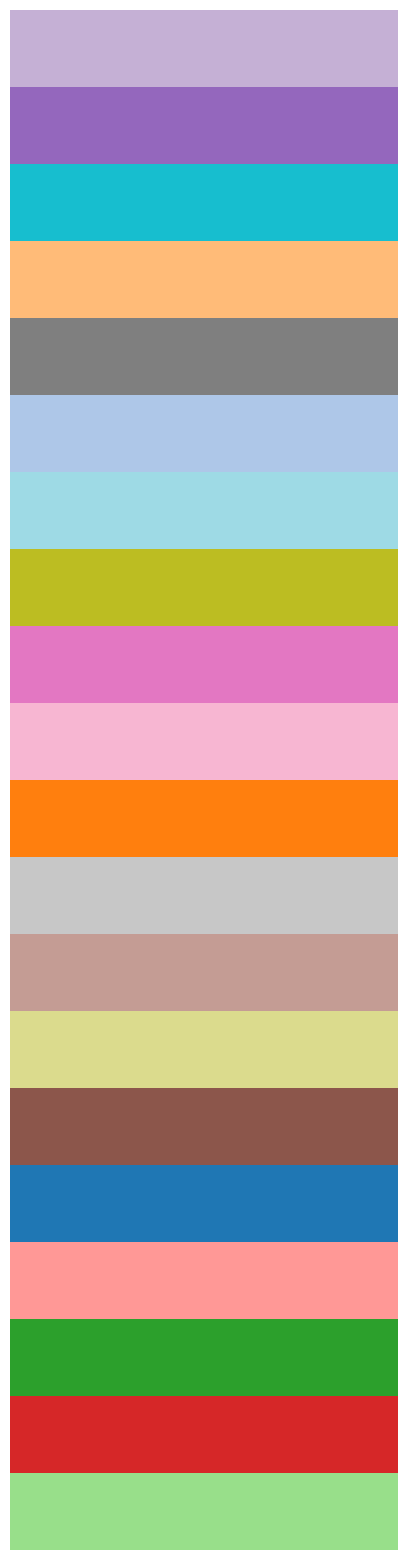

In [79]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Problem Description
Given a list of tasts of duration t_0, ,t_N and k machined that can perform them assign the tasks to 
the machine so that all the tasts will finish as soon as possible

## Algorithm Description
This problem is hard, but there are greedy approximations that work well within a factor of 4/3

## Generate instances

In [70]:
def generate_instance(N=50,max_length=20):
    ans=[]
    for i in range(50):
        ans.append(random.choice(range(1,max_length)))
    return ans


## Simple greedy algorithm

In [96]:
def simple_greedy(instance,k):
    N=len(instance)
    boxes=dict()
    height=dict()
    frames=[]
    for i in range(k):
        boxes[i]=[]
        height[i]=0
    
    for j in range(N):
        smallest=0
        for l in range(1,k):
            if height[l]<height[smallest]:
                smallest=l
        boxes[smallest].append(instance[j])
        height[smallest]=height[smallest]+instance[j]
        frames.append(list(height.values()).copy())
    return boxes,height,frames
        


In [97]:
instance=generate_instance()

In [117]:
boxes,height,frames=sorted_greedy(instance,5)

In [118]:
frames

[[19, 0, 0, 0, 0],
 [19, 19, 0, 0, 0],
 [19, 19, 19, 0, 0],
 [19, 19, 19, 18, 0],
 [19, 19, 19, 18, 17],
 [19, 19, 19, 18, 34],
 [19, 19, 19, 35, 34],
 [36, 19, 19, 35, 34],
 [36, 36, 19, 35, 34],
 [36, 36, 36, 35, 34],
 [36, 36, 36, 35, 51],
 [36, 36, 36, 52, 51],
 [52, 36, 36, 52, 51],
 [52, 52, 36, 52, 51],
 [52, 52, 51, 52, 51],
 [52, 52, 65, 52, 51],
 [52, 52, 65, 52, 65],
 [65, 52, 65, 52, 65],
 [65, 65, 65, 52, 65],
 [65, 65, 65, 65, 65],
 [78, 65, 65, 65, 65],
 [78, 77, 65, 65, 65],
 [78, 77, 77, 65, 65],
 [78, 77, 77, 77, 65],
 [78, 77, 77, 77, 77],
 [78, 89, 77, 77, 77],
 [78, 89, 88, 77, 77],
 [78, 89, 88, 88, 77],
 [78, 89, 88, 88, 87],
 [87, 89, 88, 88, 87],
 [96, 89, 88, 88, 87],
 [96, 89, 88, 88, 96],
 [96, 89, 97, 88, 96],
 [96, 89, 97, 96, 96],
 [96, 97, 97, 96, 96],
 [104, 97, 97, 96, 96],
 [104, 97, 97, 104, 96],
 [104, 97, 97, 104, 103],
 [104, 104, 97, 104, 103],
 [104, 104, 103, 104, 103],
 [104, 104, 109, 104, 103],
 [104, 104, 109, 104, 109],
 [109, 104, 109, 10

## Sorted greedy algorithm

In [102]:
def sorted_greedy(instance,k):
    sorted_instance=sorted(instance,reverse=True)
    return simple_greedy(sorted_instance,k)

In [103]:
instance=generate_instance()

In [104]:
instance

[7,
 5,
 8,
 18,
 12,
 17,
 5,
 19,
 5,
 6,
 12,
 12,
 9,
 8,
 12,
 17,
 8,
 15,
 16,
 13,
 17,
 11,
 7,
 17,
 1,
 14,
 9,
 2,
 12,
 13,
 19,
 5,
 9,
 19,
 10,
 17,
 11,
 5,
 17,
 1,
 17,
 16,
 9,
 14,
 6,
 17,
 13,
 6,
 8,
 13]

In [105]:
simple_greedy(instance,5)[1]

{0: 114, 1: 114, 2: 115, 3: 107, 4: 109}

In [106]:
sorted_greedy(instance,5)[1]

{0: 114, 1: 114, 2: 111, 3: 110, 4: 110}

In [107]:
frames

[[7, 0, 0, 0, 0],
 [7, 8, 0, 0, 0],
 [7, 8, 13, 0, 0],
 [7, 8, 13, 13, 0],
 [7, 8, 13, 13, 13],
 [24, 8, 13, 13, 13],
 [24, 19, 13, 13, 13],
 [24, 19, 22, 13, 13],
 [24, 19, 22, 18, 13],
 [24, 19, 22, 18, 25],
 [24, 19, 22, 25, 25],
 [24, 35, 22, 25, 25],
 [24, 35, 32, 25, 25],
 [25, 35, 32, 25, 25],
 [28, 35, 32, 25, 25],
 [28, 35, 32, 44, 25],
 [28, 35, 32, 44, 42],
 [32, 35, 32, 44, 42],
 [49, 35, 32, 44, 42],
 [49, 35, 51, 44, 42],
 [49, 36, 51, 44, 42],
 [49, 44, 51, 44, 42],
 [49, 44, 51, 44, 61],
 [49, 61, 51, 44, 61],
 [49, 61, 51, 49, 61],
 [56, 61, 51, 49, 61],
 [56, 61, 51, 54, 61],
 [56, 61, 59, 54, 61],
 [56, 61, 59, 55, 61],
 [56, 61, 59, 66, 61],
 [69, 61, 59, 66, 61],
 [69, 61, 72, 66, 61],
 [69, 62, 72, 66, 61],
 [69, 62, 72, 66, 78],
 [69, 66, 72, 66, 78],
 [69, 67, 72, 66, 78],
 [69, 67, 72, 81, 78],
 [69, 73, 72, 81, 78],
 [88, 73, 72, 81, 78],
 [88, 73, 80, 81, 78],
 [88, 92, 80, 81, 78],
 [88, 92, 80, 81, 86],
 [88, 92, 81, 81, 86],
 [88, 92, 88, 81, 86],
 [88, 92

In [115]:


def animate_load_balancing(frames):
    fig, ax = plt.subplots()
    #assert len(frames[0]) == len(colors), "Number of colors must match the number of bars."

    # Determine the maximum height across all frames
    max_height = max(max(frame) for frame in frames)
    
    # Set the y-axis limit
    ax.set_ylim(0, max_height + 1)  # Adding 1 for a little margin at the top
    # Initial frame
    bars = ax.bar(range(len(frames[0])), frames[0],color=colors)

    def update(frame):
        for bar, height in zip(bars, frame):
            bar.set_height(height)
        return bars

    ani = FuncAnimation(fig, update, frames=frames, repeat=False)
    ani_jshtml = ani.to_jshtml()
    # Display the animation
    return(HTML(ani_jshtml))



In [120]:
instance=generate_instance()

In [126]:
x,sortedheights,sortedframes=sorted_greedy(instance,5)
y,simpleheights,simpleframes=simple_greedy(instance,5)


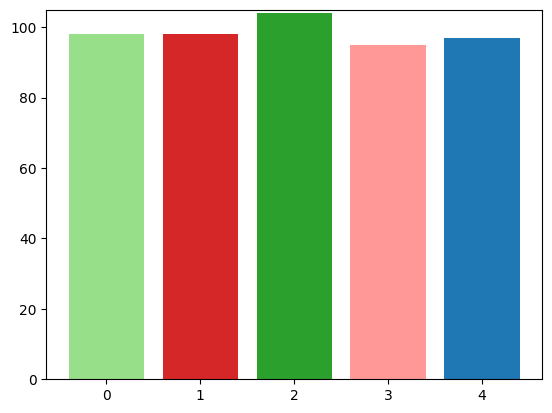

In [127]:
animate_load_balancing(simpleframes)

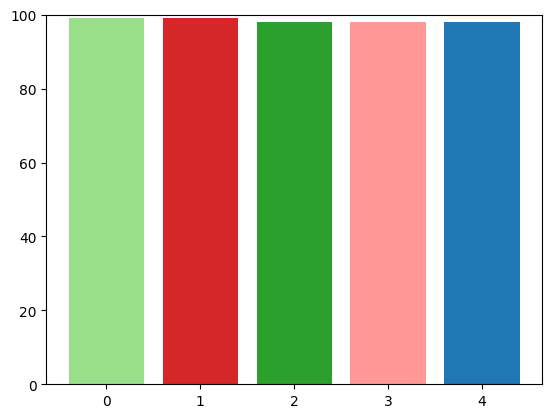

In [128]:
animate_load_balancing(sortedframes)